#### Importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading dataset

In [2]:
df = pd.read_csv('./loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### Exploring Data

In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<AxesSubplot: >

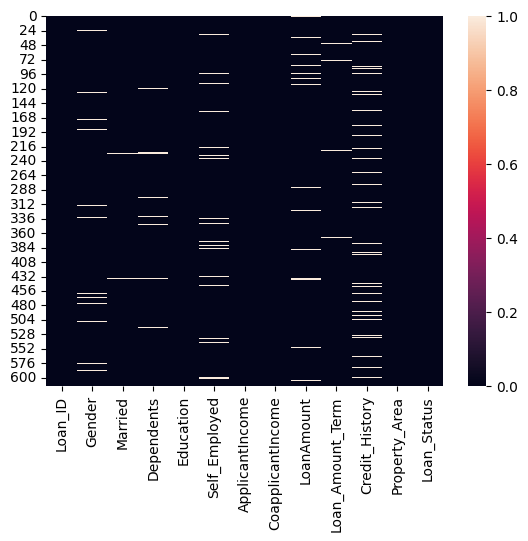

In [6]:
sns.heatmap(df.isnull())

In [7]:
married_check = df[df.Married.isna()]
married_check.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [8]:
df['CoapplicantIncome_not_null'] = df.apply(lambda x : '+' if x['CoapplicantIncome']>0 else '-',axis = 1)

<AxesSubplot: xlabel='Married', ylabel='count'>

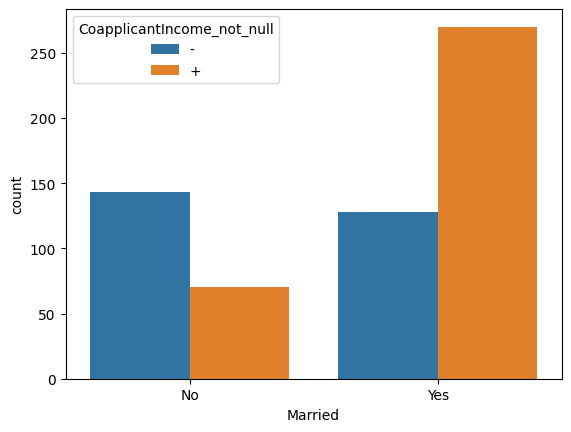

In [9]:
sns.countplot(x='Married',hue='CoapplicantIncome_not_null',data = df)

In [13]:
df['Married'] = df.Married.fillna(df.apply(lambda x: 'Yes' if x['CoapplicantIncome'] > 0 else 'No', axis=1))

In [14]:
df.Married.value_counts()

Yes    399
No     215
Name: Married, dtype: int64

Filling Dependents Nan Values

In [16]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
df.Dependents = df.Dependents.fillna('0')
df.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Filling Gender Nan Values

In [21]:
df_gender = df.groupby('Gender').mean()
df_gender

C:\Users\pc\AppData\Local\Temp\ipykernel_43824\272166525.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gender = df.groupby('Gender').mean()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Gender,,,,,
Female,4643.473214,1108.008929,126.697248,352.293578,0.831683
Male,5446.460123,1742.932352,149.265957,339.665272,0.847007


<AxesSubplot: xlabel='Gender', ylabel='ApplicantIncome'>

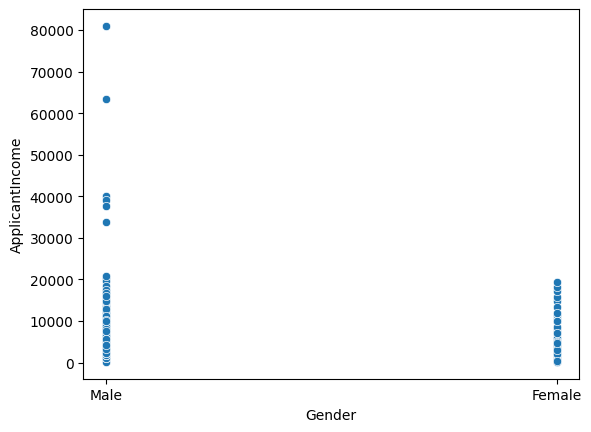

In [28]:
sns.scatterplot(df,x=df['Gender'],y=df['ApplicantIncome'])

In [30]:
gender_applicant_income_limit = df_gender.ApplicantIncome.mean()
gender_applicant_income_limit

5044.9666684925505

In [31]:
df['Gender'] = df.Gender.fillna(df.apply(lambda x: 'Female' if x['ApplicantIncome'] < gender_applicant_income_limit else 'Male', axis=1))

Fill Self_Employed Nan values

In [32]:
df['Self_Employed'] = df.Self_Employed.fillna(df.apply(lambda x: 'Yes' if x['CoapplicantIncome'] == 0 else 'No', axis=1))

Fill LoanAmount Nan values

In [38]:
df_loan = df.groupby(['Married','Gender']).mean()
df_loan

C:\Users\pc\AppData\Local\Temp\ipykernel_43824\444510969.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_loan = df.groupby(['Married','Gender']).mean()


ApplicantIncome  CoapplicantIncome  LoanAmount  \
Married Gender                                                   
No      Female      4562.445783         983.144578  115.587500   
        Male        5263.742424        1506.257576  137.488189   
Yes     Female      4439.837838        1613.972973  151.891892   
        Male        5745.726519        1810.223536  156.172414   

                Loan_Amount_Term  Credit_History  
Married Gender                                    
No      Female        353.700000        0.828947  
        Male          349.661538        0.848000  
Yes     Female        350.918919        0.781250  
        Male          335.592068        0.848943

In [39]:
df['LoanAmount'] = df.LoanAmount.fillna(df.apply(lambda x: 126.53 if x['Married'] == 'No' else 154.5, axis=1))

Fill Loan_Amount_term nan values

In [55]:
df['Loan_Amount_Term'].mean()

342.0

In [56]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(342.0 )

Fill Credit History nan values

<AxesSubplot: xlabel='Credit_History', ylabel='count'>

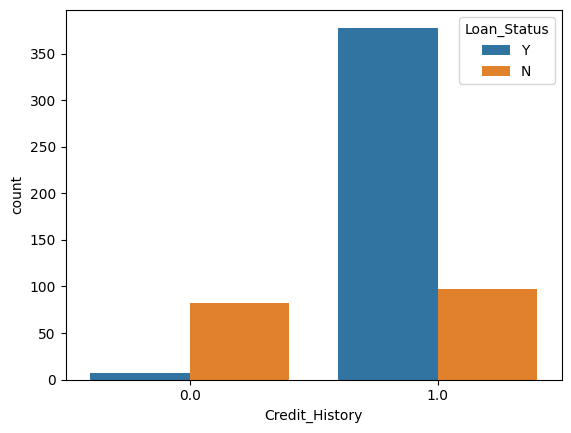

In [40]:
sns.countplot(x='Credit_History',hue='Loan_Status',data = df)

In [48]:
df.Credit_History = df.Credit_History.astype(str)

In [49]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
nan     50
Name: Credit_History, dtype: int64

In [50]:
df = df.replace({'Credit_History':{'nan':df.apply(lambda x : '1.0' if x['Loan_Status']=='Y' else '0.0',axis=1)}})

In [51]:
df['Credit_History'].value_counts()

1.0    512
0.0    102
Name: Credit_History, dtype: int64

<AxesSubplot: >

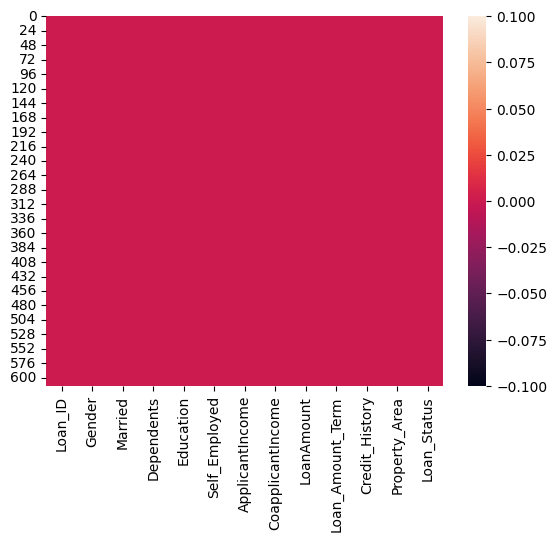

In [57]:
sns.heatmap(df.isnull())

#### Encoding categorical features


In [59]:
Area = pd.get_dummies(df['Property_Area'])
Area

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [54]:
df = df.drop(['CoapplicantIncome_not_null'],axis=1)

In [60]:
df = pd.concat([df, Area], axis = 1)

In [61]:
df.replace({'Married':{'Yes':1, 'No':0}},inplace=True)
df.replace({'Self_Employed':{'Yes':1, 'No':0}},inplace=True)
df.replace({'Loan_Status':{'Y':1, 'N':0}}, inplace=True)
df.replace({'Education':{'Graduate':1, 'Not Graduate':0}}, inplace=True)
df.replace({'Gender':{'Male':1, 'Female':0}}, inplace=True)
df['Dependents'].replace(to_replace='3+', value=4, inplace=True)
df.replace({'Credit_History':{'1.0':1,'0.0':0}},inplace=True)

In [62]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rural,Semiurban,Urban
0,LP001002,1,0,0,1,0,5849,0.0,126.53,360.0,1,Urban,1,0,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.00,360.0,1,Rural,0,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.00,360.0,1,Urban,1,0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.00,360.0,1,Urban,1,0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.00,360.0,1,Urban,1,0,0,1


In [63]:
df.drop(['Loan_ID','Property_Area'], axis = 1, inplace =True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Urban
0,1,0,0,1,0,5849,0.0,126.53,360.0,1,1,0,0,1
1,1,1,1,1,0,4583,1508.0,128.00,360.0,1,0,1,0,0
2,1,1,0,1,1,3000,0.0,66.00,360.0,1,1,0,0,1
3,1,1,0,0,0,2583,2358.0,120.00,360.0,1,1,0,0,1
4,1,0,0,1,0,6000,0.0,141.00,360.0,1,1,0,0,1


In [65]:
df['Dependents']= df['Dependents'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Rural              614 non-null    uint8  
 12  Semiurban          614 non-null    uint8  
 13  Urban              614 non-null    uint8  
dtypes: float64(3), int64(8), uint8(3)
memory usage: 54.7 KB


#### Model Training & prediction

In [66]:
X = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.svm import SVC

In [69]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [70]:
y_pred_svm = svm.predict(X_test)

Model Evaluation

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.37      0.54        43
           1       0.75      1.00      0.86        80

    accuracy                           0.78       123
   macro avg       0.87      0.69      0.70       123
weighted avg       0.84      0.78      0.75       123

